Задание простого уровня Загрузите данные из файла non_linear.csv и сгенерируйте данные до степени degree = 8 включительно. Обучите модель sklearn.linear_model.Lasso и модель sklearn.linear_model.Ridge на полученных данных, используйте коэффициент регуляризации  α=0.8  для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/non_linear.csv")
X = df["x_train"].values
Y = df["y_train"].values
df.head()


,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


C:\bin\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.335308493501588, tolerance: 0.003191225683219706
  model = cd_fast.enet_coordinate_descent(


[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.23662052e-02
 -8.77130342e-03  9.34034433e-04  1.71519415e-04  3.88621101e-06
 -1.73045762e-06] 
 [ 0.00000000e+00  5.05133950e-01  3.50113357e-01 -1.03076991e-04
 -2.30029368e-01  6.99603886e-02 -6.86910088e-04 -1.76964212e-03
  1.58301480e-04]


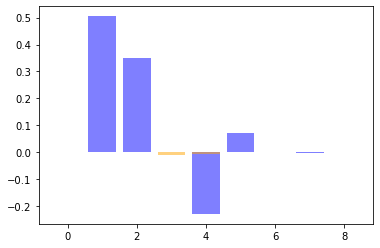

In [3]:
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt
%matplotlib inline

def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от **0** до degree возводим x в эту степень
    """
    return np.array([source_data**n for n in range(0, degree + 1)]).T

X_ = generate_degrees(X, 8)
lasso = Lasso(0.8)
lasso.fit(X_, Y)
ridge = Ridge(0.8)
ridge.fit(X_, Y)

print(lasso.coef_,'\n', ridge.coef_)

plt.bar(list(range(9)), ridge.coef_, color='blue', alpha=0.5)
plt.bar(list(range(9)), lasso.coef_, color='orange', alpha=0.5)
plt.show()

#Невооруженным взглядом видно, насколько больше коэффициенты Ridge в данном конкретном случае

Задание среднего уровня Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций понадобилось?

Итерации остановлены на шаге 173
mse =  24.31387072896345
r2_score =  0.6684538801729691


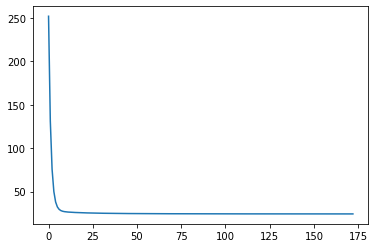

In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

boston_dataset = load_boston()
scaler = StandardScaler()
scaler.fit(boston_dataset.data)

X = scaler.transform(boston_dataset.data)
Y = boston_dataset.target

Xt, Xv, Yt, Yv = train_test_split(X, Y, test_size=0.2, random_state=42)

sgd = SGDRegressor(learning_rate='constant', eta0=0.001, fit_intercept=True, random_state=42)
w_current, epsilon = np.random.random(13), 0.001 # 13 Признаков у нас в X

#Запускаем SGD
weight_evolution= []
mse_evolution = []
for step in list(range(10000)):
    sgd = sgd.partial_fit(Xt, Yt)
    weight_evolution.append(distance.euclidean(w_current, sgd.coef_))
    if weight_evolution[-1] < epsilon:
        print("Итерации остановлены на шаге %d" % step); break
    mse_evolution.append(mean_squared_error(Yv, sgd.predict(Xv)))
    w_current = sgd.coef_.copy()

    
plt.plot(range(step), mse_evolution)
print("mse = ", mse_evolution[-1])
print("r2_score = ", r2_score(Yv, sgd.predict(Xv)))

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

### Урок 12. Домашняя работа

**Задача высокого уровня** В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} (x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k)& k\neq 0 \\
\end{array}
\right.
$$

In [ ]:
#Исходная функция
def grad(X, y, w) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    grad = np.multiply(X, error).sum(axis=0)*(-1.0)*2.0 / n
    return grad, error

#Функция с добавлением регуляризации делается просто - добавляем текущие веса с коэффициентом
def grad_reg(X, y, w, _lambda):
    # проверяю размерности без тестирования функции :)
    n = X.shape[0]      # X.shape = (n, m); Y.shape = (n,1);  w.shape = (1,m);
    L = y - X.dot(w.T)  # (n, 1)
    sum_XL = np.sum(np.multiply(X, L), axis=0) # (X * L).shape = X.shape = (n,m); sum_XL.shape = (1,m)
    grad = -2/n * (sum_XL + 2*_lambda*w)  # (1,m)
    return grad